In [1]:
# Dependencies and Setup    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)


605

## Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Build a query to get the data for a specific city
query = f"{url}appid={weather_api_key}&q="
# print(query)

In [81]:

weather_dict = []

# # Loop through the list of cities and perform a request for data on each
for city in cities:
    
    #   Get weather data
    response = requests.get(query + city).json()
    time.sleep(1)
    
    try:
        # Get weather responses
        name = (response['name'])
        id = (response['id'])
        lat = (response['coord']['lat'])
        lon = (response['coord']['lon'])
        temp = (response['main']['temp'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        speed = (response['wind']['speed'])
        country = (response['sys']['country'])
        dt = (response['dt'])
        print(f'City Name: {city}, ID: {id}' )
        
        # Append responses to dictionary keys     
        weather_dict.append({
        'City': name,
        'Lat' : lat,
        'Lon' : lon,
        'Temp' : temp,
        'Humidity' : humidity,
        'Cloudiness' : cloudiness,
        'Wind Speed' : speed,
        'Country' : country,
        'Date' : dt
        })
        weather_data = pd.DataFrame(weather_dict)
       
    
    except:             
        print(f"Key Error Ignore") 
        pass
    
   

City Name: port alfred, ID: 964432
City Name: maues, ID: 3395062
City Name: kahului, ID: 5847411
City Name: vaini, ID: 4032243
City Name: rikitea, ID: 4030556
City Name: albany, ID: 5106841
City Name: mishkino, ID: 1498633
City Name: barrow, ID: 5880054
City Name: havelock, ID: 4470244
City Name: awbari, ID: 2219235
City Name: rawson, ID: 3839307
City Name: castro, ID: 3466704
City Name: pangnirtung, ID: 6096551
City Name: vallenar, ID: 3868633
City Name: yar-sale, ID: 1486321
Key Error Ignore
City Name: virginia beach, ID: 4791259
City Name: caorle, ID: 3180749
City Name: poum, ID: 2138555
City Name: vestmanna, ID: 2610343
City Name: ushuaia, ID: 3833367
City Name: kidal, ID: 2455290
City Name: mayo, ID: 4362001
City Name: punta arenas, ID: 3874787
City Name: katobu, ID: 1640972
City Name: mar del plata, ID: 3430863
City Name: atuona, ID: 4020109
City Name: hithadhoo, ID: 1282256
City Name: avarua, ID: 4035715
City Name: bredasdorp, ID: 1015776
City Name: torbay, ID: 6167817
Key Error

City Name: sept-iles, ID: 6144312
Key Error Ignore
City Name: acajutla, ID: 3587498
City Name: huaraz, ID: 3696378
City Name: delta del tigre, ID: 3442778
City Name: avera, ID: 4231997
City Name: san carlos de bariloche, ID: 7647007
City Name: cairns, ID: 2172797
City Name: sao domingos do maranhao, ID: 3388868
City Name: vardo, ID: 777019
City Name: ketchikan, ID: 5554428
City Name: goure, ID: 2444219
City Name: nanortalik, ID: 3421765
City Name: chicama, ID: 3698359
City Name: riohacha, ID: 3670745
City Name: svobodnyy, ID: 2015833
City Name: ejutla de crespo, ID: 3529510
City Name: young, ID: 3439525
City Name: dali, ID: 1814093
City Name: guerrero negro, ID: 4021858
Key Error Ignore
Key Error Ignore
City Name: manggar, ID: 1636426
City Name: caconda, ID: 3351380
City Name: cabo san lucas, ID: 3985710
City Name: port-cartier, ID: 6111696
City Name: te anau, ID: 2181625
City Name: maningrida, ID: 2067089
City Name: luderitz, ID: 3355672
Key Error Ignore
City Name: brae, ID: 2654970
C

City Name: atar, ID: 2381334
City Name: anqing, ID: 1817993
City Name: taupo, ID: 2181742
City Name: aromashevo, ID: 1511381
City Name: svolvaer, ID: 3135020
City Name: puerto cabezas, ID: 3617154
City Name: tambun, ID: 1649378
City Name: brigantine, ID: 4500920
City Name: san patricio, ID: 4726521
City Name: hovd, ID: 1516048
City Name: kedrovyy, ID: 1538641
City Name: aiken, ID: 4569073
City Name: kirkland lake, ID: 5992836
City Name: ust-kuyga, ID: 2013921
City Name: padang, ID: 1633419
City Name: la primavera, ID: 3678000
Key Error Ignore
City Name: necochea, ID: 3430443
City Name: seoul, ID: 1835848
City Name: richards bay, ID: 962367
City Name: jumla, ID: 1283285
City Name: sungairaya, ID: 1625908
City Name: buchanan, ID: 2278158
City Name: vila franca do campo, ID: 3372472
City Name: severo-yeniseyskiy, ID: 1492566
City Name: porto novo, ID: 2392087
City Name: uppsala, ID: 2666218
City Name: bredy, ID: 1508811
City Name: rancho palos verdes, ID: 5386035
City Name: yulara, ID: 63

UnicodeEncodeError: 'charmap' codec can't encode character '\u0101' in position 5: character maps to <undefined>

## Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [89]:
# weather_dict

# # Write data to csv file
try:
    import csv
    fields = ['City', 'Lat', 'Lon', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
    filename = "weather_data.csv"

    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = fields)
        writer.writeheader()
        writer.writerows(weather_dict)
except:
    pass

In [82]:
# Create a data frame from from append lists

weather_data


,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,290.92,83,0,4.69,ZA,1633710878
1,Maués,-3.3836,-57.7186,308.85,41,99,0.93,BR,1633710763
2,Kahului,20.8947,-156.4700,295.79,86,40,4.63,US,1633710881
3,Vaini,-21.2000,-175.2000,296.24,100,40,0.00,TO,1633710882
4,Rikitea,-23.1203,-134.9692,296.35,75,76,3.41,PF,1633710870
...,...,...,...,...,...,...,...,...,...
546,Howard Springs,-12.4970,131.0470,299.36,90,80,2.09,AU,1633711707
547,Ranau,5.9538,116.6641,295.51,90,100,0.78,MY,1633711709
548,Ust'-Uda,54.1742,103.0304,275.18,95,100,4.11,RU,1633711710
549,Loralai,30.3705,68.5980,297.75,15,0,6.74,PK,1633711538


In [83]:
weather_data.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.222035,21.708269,290.545481,70.462795,55.577132,3.419401,1.633711e+09
std,33.290227,90.962925,11.068326,20.758831,37.696213,2.450196,2.589682e+02
min,-54.800000,-175.200000,252.790000,5.000000,0.000000,0.000000,1.633711e+09
25%,-7.897350,-59.984750,282.205000,60.000000,20.000000,1.555000,1.633711e+09
50%,22.566700,25.570100,293.090000,75.000000,66.000000,2.870000,1.633711e+09
75%,48.986450,106.083350,299.175000,86.000000,90.000000,4.775000,1.633711e+09
max,78.218600,179.316700,313.730000,100.000000,100.000000,18.010000,1.633712e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

### # Get the indices of cities that have humidity over 100%.
#####BY DEFINITION, 100% humidity is as high as physically possible therefore no cities have a higher than 100% humidity.
But test just to be sure :

In [34]:
# Test to see whether weather is wetter than 100
wet_weather = weather_data[(weather_data['Humidity'] > 100)]
# wet_weather

wet_weather
#  No cities report greater than 100% humidity

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Temperatures are warmest near the equator and 
decrease as one moves away from the equator. 


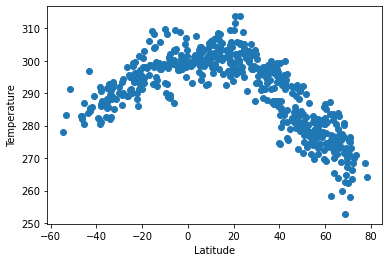

In [91]:
# Lat vs Temp
plt.scatter(weather_data['Lat'],weather_data['Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f'Temperatures are warmest near the equator and ')
print(f'decrease as one moves away from the equator. ')
plt.savefig('lat_vs_temp.png')
plt.show()

Humidity does not seem closely corralated to latitudes. 


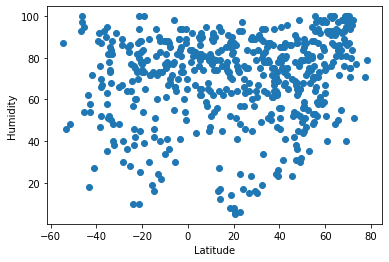

In [92]:
# Lat vs Humidity
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'Humidity does not seem closely corralated to latitudes. ')
plt.savefig('lat_vs_humidity.png')
plt.show()

Cloudines does not seem closely corralated to latitudes. 


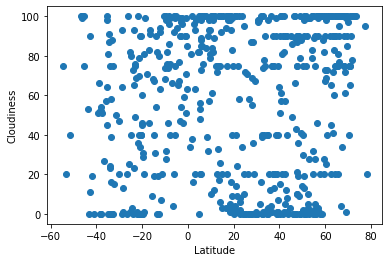

In [93]:
# Lat vs Cloudiness
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'Cloudines does not seem closely corralated to latitudes. ')
plt.savefig('lat_vs_cloudiness.png')
plt.show()

Wind Speed does not seem closely corralated to latitudes. 


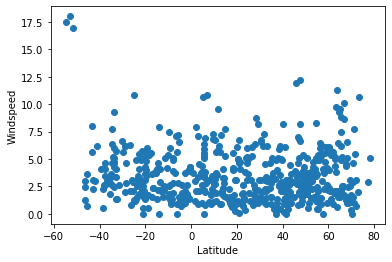

In [94]:
# Lat vs Windspeed
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f'Wind Speed does not seem closely corralated to latitudes. ')
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [105]:
# Test whether city latitude is north (> 0) or south (< o)
# Put in North or South bins and do regression

weather_data['Hemisphere'] = ['North' if x > 0 else 'South' for x in weather_data['Lat']]
# weather_data

south_cities = weather_data[weather_data['Hemisphere'] == 'South']
north_cities = weather_data[weather_data['Hemisphere'] == 'North']


The r-squared is: 0.7666121850336929
Temperature is strongly corralated with northern latitudes.


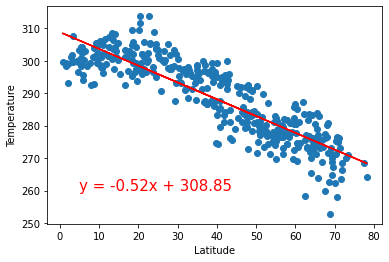

In [106]:
# Northern Hemisphere - Temp vs. Latitude Linear Regression  

x_values = north_cities['Lat']
y_values = north_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
print(f'Temperature is strongly corralated with northern latitudes.')
plt.show()

The r-squared is: 0.5840484761064951
Temperature is moderatley corralated with Southern latitudes.


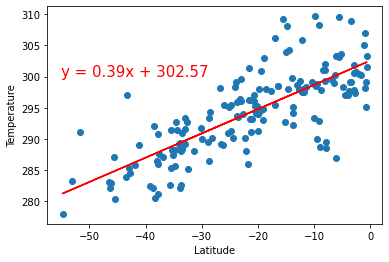

In [107]:
# Southern Hemisphere - Temp vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
print(f'Temperature is moderatley corralated with Southern latitudes.')
plt.show()

The r-squared is: 0.03416941746855479
Humidity is not strongly corralated with latitudes in the North.


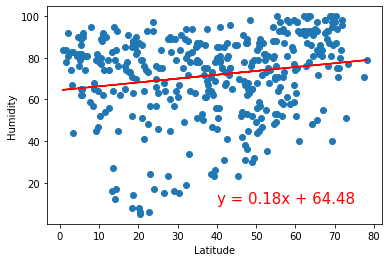

In [108]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 

x_values = north_cities['Lat']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(f'Humidity is not strongly corralated with latitudes in the North.')
plt.show()

The r-squared is: 0.003329177225324735
Humidity is not corralated with latitudes in the south.


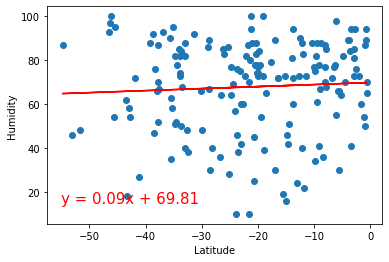

In [109]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(f'Humidity is not corralated with latitudes in the south.')
plt.show()

The r-squared is: 0.0025932594196653893
Cloudiness is not strongly corralated with northern latitudes.


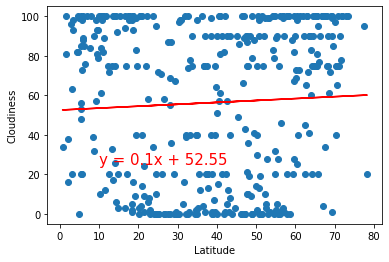

In [110]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(f'Cloudiness is not strongly corralated with northern latitudes.')
plt.show()


The r-squared is: 0.06863892681723754
Cloudiness is not strongly corralated with southern latitudes.


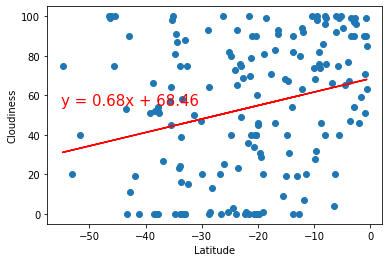

In [111]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(f'Cloudiness is not strongly corralated with southern latitudes.')
plt.show()

The r-squared is: 0.0016147027438066207
Wind Speed is not corralated with northern latitudes.


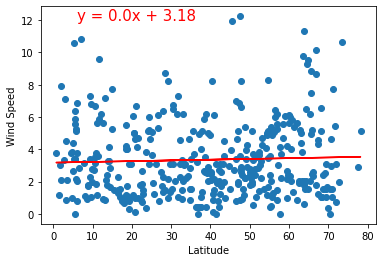

In [113]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print(f'Wind Speed is not corralated with northern latitudes.')
plt.show()


The r-squared is: 0.12035704319665237
Wind Speed is moderately corralated with southern latitudes.


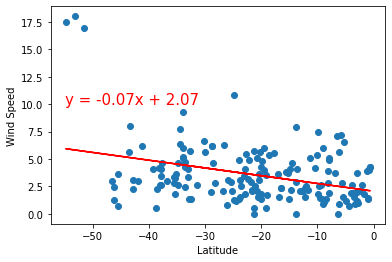

In [114]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print(f'Wind Speed is moderately corralated with southern latitudes.')
plt.show()